### KNN Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")


### Reading Dataset

In [3]:
data= pd.read_csv('data_cleaned.csv')

In [4]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [5]:
data.shape

(891, 25)

In [6]:
data.dtypes

Survived        int64
Age           float64
Fare          float64
Pclass_1        int64
Pclass_2        int64
Pclass_3        int64
Sex_female      int64
Sex_male        int64
SibSp_0         int64
SibSp_1         int64
SibSp_2         int64
SibSp_3         int64
SibSp_4         int64
SibSp_5         int64
SibSp_8         int64
Parch_0         int64
Parch_1         int64
Parch_2         int64
Parch_3         int64
Parch_4         int64
Parch_5         int64
Parch_6         int64
Embarked_C      int64
Embarked_Q      int64
Embarked_S      int64
dtype: object

In [7]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

### Seprate Variables: Independent and Dependent Variables


In [8]:
x= data.drop(['Survived'], axis=1)

In [9]:
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,38.0,71.2833,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,35.0,53.1000,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,35.0,8.0500,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [10]:
y= data['Survived']

In [11]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [12]:
x.shape, y.shape

((891, 24), (891,))

### Scaling the data (Using MinMax Scaler)


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [14]:
x_scaled= scaler.fit_transform(x)

In [15]:
x= pd.DataFrame(x_scaled, columns= x.columns)

In [16]:
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<img src="Image 1.png"  style="width:600px;" align="center">

### Importing the train test split function

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_x, test_x, train_y, test_y = train_test_split(x,y, random_state=56, stratify=y)

In [19]:
train_x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
40,0.497361,0.018494,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,0.484795,0.061045,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
547,0.367921,0.027058,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
312,0.321438,0.050749,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75,0.308872,0.014932,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
test_x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
560,0.367921,0.015127,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
582,0.673285,0.050749,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
546,0.233476,0.050749,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
575,0.233476,0.028302,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
460,0.597889,0.051822,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
train_y.head()

40     0
13     0
547    1
312    0
75     0
Name: Survived, dtype: int64

In [22]:
test_y.head()

560    0
582    0
546    1
575    0
460    1
Name: Survived, dtype: int64

### Implementing KNN Classifier¶

In [23]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [24]:
from sklearn.metrics import f1_score

In [25]:
# creating instance of KNN

clf= KNN(n_neighbors=10)



In [26]:
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [27]:
# Fitting the model

clf.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [28]:
# Predicting over the Train Set and calculating F1

test_predict= clf.predict(test_x)
k= f1_score(test_predict,test_y)
print('Test F1 score ',k)

Test F1 score  0.6956521739130435


### Elbow for Classifier

In [29]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [30]:
#Defining K range

k = range(6, 20, 2)

In [31]:
# calling above defined function

test = Elbow(k)

In [32]:
test

[0.33333333333333326,
 0.2993630573248408,
 0.30434782608695654,
 0.2962962962962963,
 0.2962962962962963,
 0.29999999999999993,
 0.3125]

### Plotting the curve

Text(0.5, 1.0, 'Elbow Curve for test')

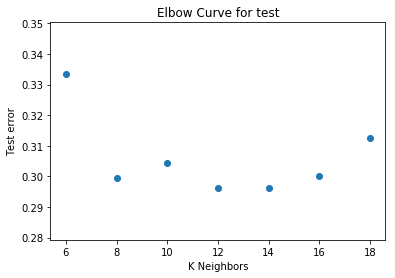

In [33]:
# plotting the Curves
plt.scatter(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

Text(0.5, 1.0, 'Elbow Curve for test')

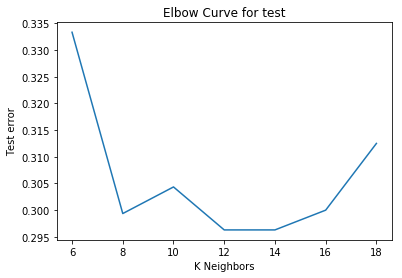

In [34]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [35]:
# Creating instance of KNN

clf = KNN(n_neighbors = 12)

# Fitting the model

clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1

test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Test F1 Score     0.7037037037037037


In [36]:
# Creating instance of KNN

clf = KNN(n_neighbors = 14)

# Fitting the model

clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1

test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Test F1 Score     0.7037037037037037


# KNN Regression

### Reading Data

In [37]:
data = pd.read_csv('train_cleaned.csv')
data.shape

(8523, 46)

In [38]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [39]:
data.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
Item_Fat_Content_LF                  int64
Item_Fat_Content_Low Fat             int64
Item_Fat_Content_Regular             int64
Item_Fat_Content_low fat             int64
Item_Fat_Content_reg                 int64
Item_Type_Baking Goods               int64
Item_Type_Breads                     int64
Item_Type_Breakfast                  int64
Item_Type_Canned                     int64
Item_Type_Dairy                      int64
Item_Type_Frozen Foods               int64
Item_Type_Fruits and Vegetables      int64
Item_Type_Hard Drinks                int64
Item_Type_Health and Hygiene         int64
Item_Type_Household                  int64
Item_Type_Meat                       int64
Item_Type_Others                     int64
Item_Type_Seafood                    int64
Item_Type_S

In [40]:
data.isnull().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Item_Outlet_Sales                  0
Item_Fat_Content_LF                0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Fat_Content_low fat           0
Item_Fat_Content_reg               0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT010           0
O

### Seprate variables: Independent and Dependent Variables¶

In [41]:
x = data.drop(['Item_Outlet_Sales'], axis=1)           #features
y = data['Item_Outlet_Sales']                          #target
x.shape, y.shape

((8523, 45), (8523,))

In [42]:
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [43]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

### Scaling the data (Using MinMax Scaler)¶

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [45]:
x_scaled = scaler.fit_transform(x)

In [46]:
x_scaled

array([[0.43559719, 0.04886645, 0.92750715, ..., 1.        , 0.        ,
        0.        ],
       [0.27728337, 0.05870508, 0.0720684 , ..., 0.        , 1.        ,
        0.        ],
       [0.81967213, 0.05103696, 0.46828841, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.49648712, 0.10714751, 0.22849221, ..., 1.        , 0.        ,
        0.        ],
       [0.33770492, 0.44221878, 0.30493925, ..., 0.        , 1.        ,
        0.        ],
       [0.69320843, 0.13666114, 0.18750976, ..., 1.        , 0.        ,
        0.        ]])

In [47]:
x = pd.DataFrame(x_scaled)

In [48]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.435597,0.048866,0.927507,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.277283,0.058705,0.072068,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.819672,0.051037,0.468288,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.899297,0.000000,0.640093,0.541667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.418267,0.000000,0.095805,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


<img src="Image 1.png"  style="width:600px;" align="center">

### Importing Train test split



In [49]:
from sklearn.model_selection import train_test_split

In [50]:
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [51]:
train_x.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
178,0.000000,0.581665,0.045931,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3644,0.843091,0.047144,0.543596,0.708333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3197,0.000000,0.130787,0.714284,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1791,0.000000,0.246701,0.286710,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2184,0.312646,0.127657,0.259154,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [52]:
test_x.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
2172,0.576112,0.541946,0.602082,0.541667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6228,0.341218,0.000000,0.525635,0.916667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2404,0.782201,0.365838,0.636709,0.916667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
99,0.409836,0.227251,0.664544,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4945,0.430679,0.048285,0.213793,0.791667,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [53]:
train_y.head()

178       42.6112
3644    2059.9852
3197    3981.4840
1791     492.6920
2184    2406.2012
Name: Item_Outlet_Sales, dtype: float64

In [54]:
test_y.head()

2172     697.7584
6228    1414.1592
2404    3078.6592
99      1314.2892
4945    1403.5064
Name: Item_Outlet_Sales, dtype: float64

## Implementing KNN Regressor¶

In [55]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [56]:
# Creating instance of KNN

reg = KNN(n_neighbors = 5)

# Fitting the model

reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE

test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     1714854.6015010108


In [57]:
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)
    
    return test_mse

In [58]:
#Defining K range

k = range(1,40)

In [59]:
# calling above defined function

test = Elbow(k)

In [60]:
test

[2651157.980666894,
 2067540.4602619768,
 1858948.3428714552,
 1755117.0989501378,
 1714854.6015010108,
 1660965.875081389,
 1639285.1155163131,
 1623231.915631118,
 1622957.615752187,
 1622446.6633706575,
 1638195.4970110096,
 1641741.7587531253,
 1659234.2684664126,
 1668300.8457620258,
 1680424.3616683693,
 1690259.2513979317,
 1712912.4473073669,
 1733391.4332291218,
 1747351.5028353645,
 1772866.59681995,
 1787662.4757327947,
 1804847.9268451156,
 1816815.7685454616,
 1831084.718043219,
 1845161.9470465663,
 1860499.204086161,
 1871146.016432345,
 1872738.1261969453,
 1882583.7142996502,
 1888181.3847773261,
 1890835.2993820142,
 1906099.8776104182,
 1918069.09549502,
 1921818.1619209852,
 1926830.274184454,
 1928638.6712475163,
 1927129.884440622,
 1924599.527162496,
 1924150.1463620465]

In [61]:
k

range(1, 40)

Text(0.5, 1.0, 'Elbow Curve for test')

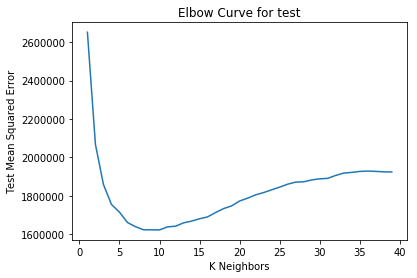

In [62]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [63]:
# Creating instance of KNN

reg = KNN(n_neighbors = 9)

# Fitting the model

reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1

test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     1622957.615752187
